In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Construct a tf.data.Dataset
ds = tfds.load('mnist', split='train', shuffle_files=True)

# Build your input pipeline
ds = ds.shuffle(1024).batch(32).prefetch(tf.data.AUTOTUNE)
for example in ds.take(1):
  image, label = example["image"], example["label"]

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop
from keras.utils import np_utils
import pylab as plt
# model_from_json ---json dump and pick from json

In [3]:
batch_size = 128
num_classes = 10
# iteratively giving your data to your model is epochs
# How many times you are feeding data to your model
epochs = 2

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test)= mnist.load_data()
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# Normalize to 0 to 1 range
x_train /= 255
x_test /= 255

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)
print(y_train[0])

11490434/11490434 [==============================] - 1s 0us/step
60000 train samples
10000 test samples
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


Label: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


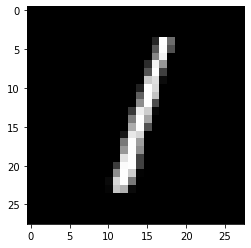

In [4]:
print("Label:",y_test[2:3])
plt.imshow(x_test[2:3].reshape(28,28), cmap='gray')
plt.show()

In [5]:
first_layer_size = 32
model = Sequential()
model.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model.add(Dense(68, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 68)                2244      
                                                                 
 dense_2 (Dense)             (None, 32)                2208      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 29,902
Trainable params: 29,902
Non-trainable params: 0
_________________________________________________________________


Shape of First Layer (784, 32)
Visualization of First Layer


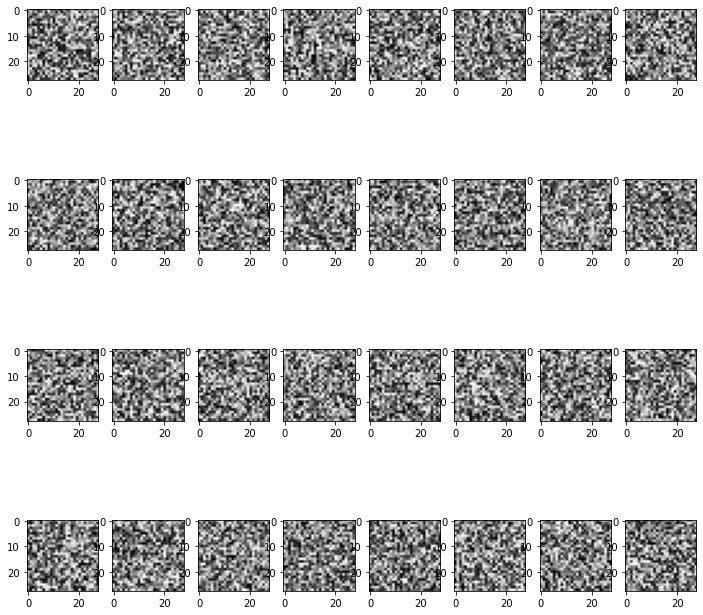

In [6]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')
plt.show()

In [7]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

In [30]:
history1 = model.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=15,
                    verbose=2)

Epoch 1/15
469/469 - 2s - loss: 0.2066 - accuracy: 0.9427 - 2s/epoch - 4ms/step
Epoch 2/15
469/469 - 2s - loss: 0.1800 - accuracy: 0.9496 - 2s/epoch - 3ms/step
Epoch 3/15
469/469 - 2s - loss: 0.1609 - accuracy: 0.9547 - 2s/epoch - 3ms/step
Epoch 4/15
469/469 - 2s - loss: 0.1469 - accuracy: 0.9578 - 2s/epoch - 3ms/step
Epoch 5/15
469/469 - 2s - loss: 0.1349 - accuracy: 0.9612 - 2s/epoch - 3ms/step
Epoch 6/15
469/469 - 2s - loss: 0.1256 - accuracy: 0.9635 - 2s/epoch - 3ms/step
Epoch 7/15
469/469 - 2s - loss: 0.1177 - accuracy: 0.9661 - 2s/epoch - 4ms/step
Epoch 8/15
469/469 - 2s - loss: 0.1106 - accuracy: 0.9682 - 2s/epoch - 5ms/step
Epoch 9/15
469/469 - 1s - loss: 0.1052 - accuracy: 0.9697 - 1s/epoch - 3ms/step
Epoch 10/15
469/469 - 2s - loss: 0.1004 - accuracy: 0.9705 - 2s/epoch - 3ms/step
Epoch 11/15
469/469 - 1s - loss: 0.0958 - accuracy: 0.9725 - 1s/epoch - 3ms/step
Epoch 12/15
469/469 - 1s - loss: 0.0916 - accuracy: 0.9739 - 1s/epoch - 3ms/step
Epoch 13/15
469/469 - 2s - loss: 0.08

In [31]:
history2 = model.fit(x_test,y_test,
                    batch_size=batch_size,
                    epochs=15,
                    verbose=2)

Epoch 1/15
79/79 - 0s - loss: 0.1172 - accuracy: 0.9648 - 272ms/epoch - 3ms/step
Epoch 2/15
79/79 - 0s - loss: 0.0996 - accuracy: 0.9699 - 243ms/epoch - 3ms/step
Epoch 3/15
79/79 - 0s - loss: 0.0887 - accuracy: 0.9727 - 258ms/epoch - 3ms/step
Epoch 4/15
79/79 - 0s - loss: 0.0784 - accuracy: 0.9763 - 262ms/epoch - 3ms/step
Epoch 5/15
79/79 - 0s - loss: 0.0715 - accuracy: 0.9778 - 267ms/epoch - 3ms/step
Epoch 6/15
79/79 - 0s - loss: 0.0653 - accuracy: 0.9811 - 265ms/epoch - 3ms/step
Epoch 7/15
79/79 - 0s - loss: 0.0594 - accuracy: 0.9822 - 263ms/epoch - 3ms/step
Epoch 8/15
79/79 - 0s - loss: 0.0549 - accuracy: 0.9852 - 259ms/epoch - 3ms/step
Epoch 9/15
79/79 - 0s - loss: 0.0505 - accuracy: 0.9860 - 259ms/epoch - 3ms/step
Epoch 10/15
79/79 - 0s - loss: 0.0463 - accuracy: 0.9883 - 264ms/epoch - 3ms/step
Epoch 11/15
79/79 - 0s - loss: 0.0439 - accuracy: 0.9895 - 272ms/epoch - 3ms/step
Epoch 12/15
79/79 - 0s - loss: 0.0398 - accuracy: 0.9906 - 255ms/epoch - 3ms/step
Epoch 13/15
79/79 - 0s - 

In [32]:
model.test_on_batch(x_test, y_test)
model.metrics_names

['loss', 'accuracy']

dict_keys(['loss', 'accuracy'])


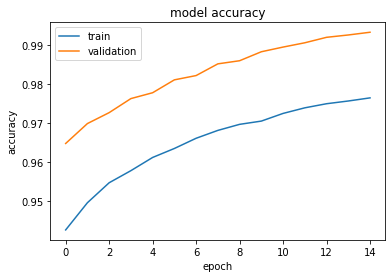

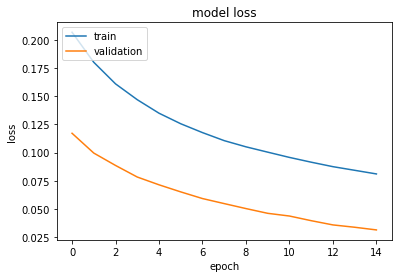

In [33]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [47]:
from tensorflow.keras.optimizers import Adagrad
first_layer_size = 32
model2 = Sequential()
model2.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model2.add(Dense(68, activation='sigmoid'))
model2.add(Dense(32, activation='sigmoid'))
model2.add(Dense(num_classes, activation='softmax'))
model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 68)                2244      
                                                                 
 dense_2 (Dense)             (None, 32)                2208      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 29,902
Trainable params: 29,902
Non-trainable params: 0
_________________________________________________________________


In [34]:
keras.optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)

In [ ]:
w = []
for layer in model.layers:
    weights = layer.get_weights()
    w.append(weights)

layer1 = np.array(w[0][0])
print("Shape of First Layer",layer1.shape)
print("Visualization of First Layer")
fig=plt.figure(figsize=(12, 12))
columns = 8
rows = int(first_layer_size/8)
for i in range(1, columns*rows +1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(layer1[:,i-1].reshape(28,28),cmap='gray')

In [49]:
model2.compile(loss='categorical_crossentropy',
              optimizer=Adagrad(),
              metrics=['accuracy'])

In [44]:
keras.backend.clear_session()

In [ ]:
history1 = model2.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=15,
                    verbose=2)

In [53]:
history2 = model2.fit(x_test,y_test,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=2)

Epoch 1/10
79/79 - 0s - loss: 2.2899 - accuracy: 0.1135 - 255ms/epoch - 3ms/step
Epoch 2/10
79/79 - 0s - loss: 2.2898 - accuracy: 0.1136 - 257ms/epoch - 3ms/step
Epoch 3/10
79/79 - 0s - loss: 2.2896 - accuracy: 0.1135 - 267ms/epoch - 3ms/step
Epoch 4/10
79/79 - 0s - loss: 2.2895 - accuracy: 0.1136 - 272ms/epoch - 3ms/step
Epoch 5/10
79/79 - 0s - loss: 2.2893 - accuracy: 0.1136 - 259ms/epoch - 3ms/step
Epoch 6/10
79/79 - 0s - loss: 2.2892 - accuracy: 0.1136 - 268ms/epoch - 3ms/step
Epoch 7/10
79/79 - 0s - loss: 2.2890 - accuracy: 0.1139 - 266ms/epoch - 3ms/step
Epoch 8/10
79/79 - 0s - loss: 2.2889 - accuracy: 0.1137 - 250ms/epoch - 3ms/step
Epoch 9/10
79/79 - 0s - loss: 2.2888 - accuracy: 0.1139 - 246ms/epoch - 3ms/step
Epoch 10/10
79/79 - 0s - loss: 2.2886 - accuracy: 0.1138 - 252ms/epoch - 3ms/step


dict_keys(['loss', 'accuracy'])


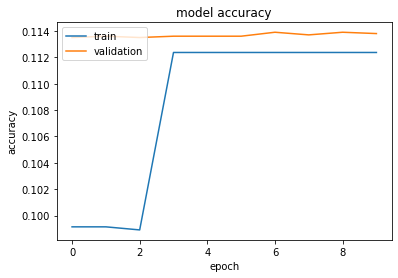

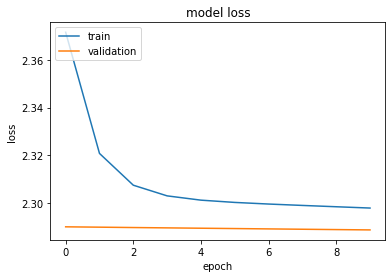

In [54]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [57]:
from tensorflow.keras.optimizers import Adam
first_layer_size = 32
model3 = Sequential()
model3.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model3.add(Dense(68, activation='sigmoid'))
model3.add(Dense(32, activation='sigmoid'))
model3.add(Dense(num_classes, activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 32)                25120     
                                                                 
 dense_9 (Dense)             (None, 68)                2244      
                                                                 
 dense_10 (Dense)            (None, 32)                2208      
                                                                 
 dense_11 (Dense)            (None, 10)                330       
                                                                 
Total params: 29,902
Trainable params: 29,902
Non-trainable params: 0
_________________________________________________________________


In [58]:
model3.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [60]:
history1 = model3.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=15,
                    verbose=2)
history2 = model3.fit(x_test,y_test,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=2)

Epoch 1/15
469/469 - 4s - loss: 1.4770 - accuracy: 0.5823 - 4s/epoch - 8ms/step
Epoch 2/15
469/469 - 2s - loss: 0.5210 - accuracy: 0.8763 - 2s/epoch - 4ms/step
Epoch 3/15
469/469 - 2s - loss: 0.3287 - accuracy: 0.9133 - 2s/epoch - 3ms/step
Epoch 4/15
469/469 - 2s - loss: 0.2549 - accuracy: 0.9307 - 2s/epoch - 4ms/step
Epoch 5/15
469/469 - 2s - loss: 0.2138 - accuracy: 0.9408 - 2s/epoch - 3ms/step
Epoch 6/15
469/469 - 2s - loss: 0.1858 - accuracy: 0.9482 - 2s/epoch - 4ms/step
Epoch 7/15
469/469 - 2s - loss: 0.1649 - accuracy: 0.9531 - 2s/epoch - 4ms/step
Epoch 8/15
469/469 - 2s - loss: 0.1502 - accuracy: 0.9574 - 2s/epoch - 5ms/step
Epoch 9/15
469/469 - 2s - loss: 0.1373 - accuracy: 0.9613 - 2s/epoch - 4ms/step
Epoch 10/15
469/469 - 2s - loss: 0.1270 - accuracy: 0.9638 - 2s/epoch - 3ms/step
Epoch 11/15
469/469 - 2s - loss: 0.1184 - accuracy: 0.9660 - 2s/epoch - 4ms/step
Epoch 12/15
469/469 - 2s - loss: 0.1105 - accuracy: 0.9684 - 2s/epoch - 3ms/step
Epoch 13/15
469/469 - 2s - loss: 0.10

dict_keys(['loss', 'accuracy'])


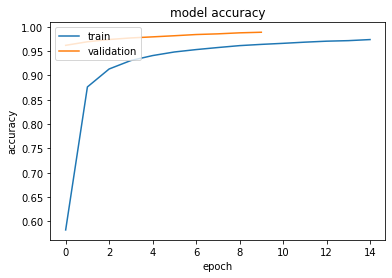

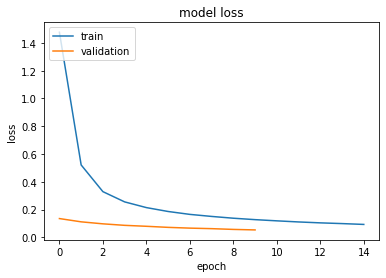

In [61]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [63]:
tf.keras.optimizers.experimental.Adadelta
first_layer_size = 32
model4 = Sequential()
model4.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model4.add(Dense(68, activation='sigmoid'))
model4.add(Dense(32, activation='sigmoid'))
model4.add(Dense(num_classes, activation='softmax'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                25120     
                                                                 
 dense_13 (Dense)            (None, 68)                2244      
                                                                 
 dense_14 (Dense)            (None, 32)                2208      
                                                                 
 dense_15 (Dense)            (None, 10)                330       
                                                                 
Total params: 29,902
Trainable params: 29,902
Non-trainable params: 0
_________________________________________________________________


In [70]:
model4.compile(loss='categorical_crossentropy',
              optimizer='Adadelta',
              metrics=['accuracy'])

In [71]:
history1 = model4.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=15,
                    verbose=2)
history2 = model4.fit(x_test,y_test,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=2)

Epoch 1/15
469/469 - 3s - loss: 2.5535 - accuracy: 0.0986 - 3s/epoch - 7ms/step
Epoch 2/15
469/469 - 2s - loss: 2.5342 - accuracy: 0.0986 - 2s/epoch - 4ms/step
Epoch 3/15
469/469 - 2s - loss: 2.5142 - accuracy: 0.0986 - 2s/epoch - 4ms/step
Epoch 4/15
469/469 - 2s - loss: 2.4949 - accuracy: 0.0986 - 2s/epoch - 4ms/step
Epoch 5/15
469/469 - 2s - loss: 2.4766 - accuracy: 0.0986 - 2s/epoch - 4ms/step
Epoch 6/15
469/469 - 2s - loss: 2.4595 - accuracy: 0.0986 - 2s/epoch - 4ms/step
Epoch 7/15
469/469 - 3s - loss: 2.4439 - accuracy: 0.0986 - 3s/epoch - 6ms/step
Epoch 8/15
469/469 - 2s - loss: 2.4298 - accuracy: 0.0986 - 2s/epoch - 4ms/step
Epoch 9/15
469/469 - 2s - loss: 2.4170 - accuracy: 0.0986 - 2s/epoch - 4ms/step
Epoch 10/15
469/469 - 2s - loss: 2.4056 - accuracy: 0.0986 - 2s/epoch - 4ms/step
Epoch 11/15
469/469 - 2s - loss: 2.3954 - accuracy: 0.0986 - 2s/epoch - 3ms/step
Epoch 12/15
469/469 - 2s - loss: 2.3863 - accuracy: 0.0986 - 2s/epoch - 4ms/step
Epoch 13/15
469/469 - 2s - loss: 2.37

dict_keys(['loss', 'accuracy'])


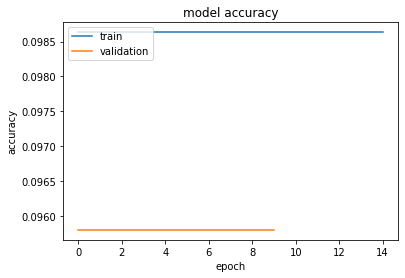

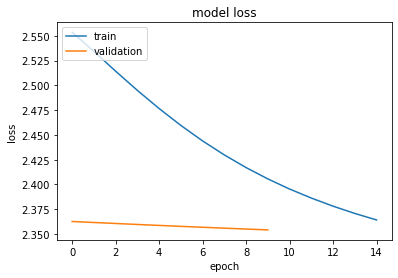

In [72]:
print(history.history.keys())
#  "Accuracy"
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 32)                25120     
                                                                 
 dense_17 (Dense)            (None, 68)                2244      
                                                                 
 dense_18 (Dense)            (None, 32)                2208      
                                                                 
 dense_19 (Dense)            (None, 10)                330       
                                                                 
Total params: 29,902
Trainable params: 29,902
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
469/469 - 4s - loss: 2.3091 - accuracy: 0.1095 - 4s/epoch - 8ms/step
Epoch 2/15
469/469 - 2s - loss: 2.2989 - accuracy: 0.1124 - 2s/epoch - 4ms/step
Epoch 3/15
469/469 - 1

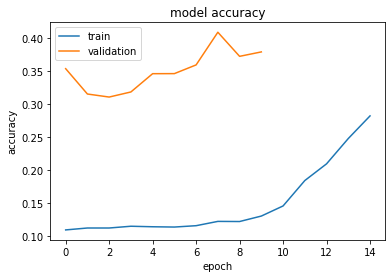

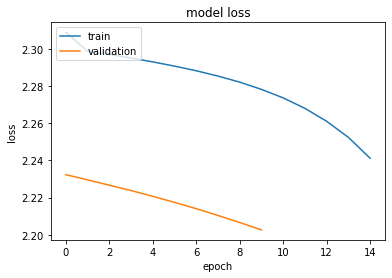

In [73]:
from tensorflow.keras.optimizers import SGD
first_layer_size = 32
model5 = Sequential()
model5.add(Dense(first_layer_size, activation='sigmoid', input_shape=(784,)))
model5.add(Dense(68, activation='sigmoid'))
model5.add(Dense(32, activation='sigmoid'))
model5.add(Dense(num_classes, activation='softmax'))
model5.summary()

model5.compile(loss='categorical_crossentropy',
              optimizer='SGD',
              metrics=['accuracy'])

history1 = model5.fit(x_train,y_train,
                    batch_size=batch_size,
                    epochs=15,
                    verbose=2)
history2 = model5.fit(x_test,y_test,
                    batch_size=batch_size,
                    epochs=10,
                    verbose=2)

print(history.history.keys())
#  "Accuracy"
plt.plot(history1.history['accuracy'])
plt.plot(history2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history1.history['loss'])
plt.plot(history2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()